## Simple Linear Regression Model

In [66]:
import os
os.chdir('/Users/stephaniezhou/Desktop/DS/Music-Therapy-Recommendation-Engine')

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model, metrics
import numpy as np

In [68]:
# Import data
csv_path = 'data/cleaned_mxmh_survey.csv'
encoded_path = 'data/improve_encoded_frequencies.csv'
df = pd.read_csv(csv_path, delimiter=';')
encoded_df = pd.read_csv(encoded_path, delimiter=';')
encoded_df.head(10)

,encoded_id,survey_id,Frequency_Classical_Encoded,Frequency_Country_Encoded,Frequency_EDM_Encoded,Frequency_Folk_Encoded,Frequency_Gospel_Encoded,Frequency_HipHop_Encoded,Frequency_Jazz_Encoded,Frequency_Kpop_Encoded,Frequency_Latin_Encoded,Frequency_Lofi_Encoded,Frequency_Metal_Encoded,Frequency_Pop_Encoded,Frequency_RB_Encoded,Frequency_Rap_Encoded,Frequency_Rock_Encoded,Frequency_VideoGameMusic_Encoded
0,1,1,2,1,3,2,1,1,4,1,1,1,1,3,2,1,4,2
1,2,2,2,2,3,1,1,2,1,2,3,1,1,4,1,1,1,2
2,3,3,4,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2
3,4,4,4,1,4,1,1,4,3,3,2,3,1,3,4,4,2,3
4,5,5,1,1,2,2,1,1,1,1,1,2,3,3,1,1,4,3
5,6,6,2,1,1,1,1,4,2,1,1,1,4,3,3,4,4,4
6,7,7,3,2,3,2,3,3,2,3,2,3,2,4,3,3,2,1
7,8,8,2,2,1,2,3,3,3,1,2,1,3,1,3,2,4,3
8,9,9,2,2,2,2,3,2,2,1,2,2,1,3,3,2,3,3
9,10,10,1,3,2,4,1,2,1,1,2,2,2,2,2,3,3,3


In [69]:
# Define the feature matrix (X) and target (y)
X = df[['Age', 'Anxiety']].values
y = encoded_df['Frequency_Country_Encoded'].values

# Split the data into training and testing sets
X_train, X_test,\
    y_train, y_test = train_test_split(X, y, 
                                       test_size=0.4, 
                                       random_state=1
)


In [70]:
# Creating and Training the Linear Regression Model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)

# Variance score
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 0.0103332  -0.00704646]
Variance score: 0.007070601738814575


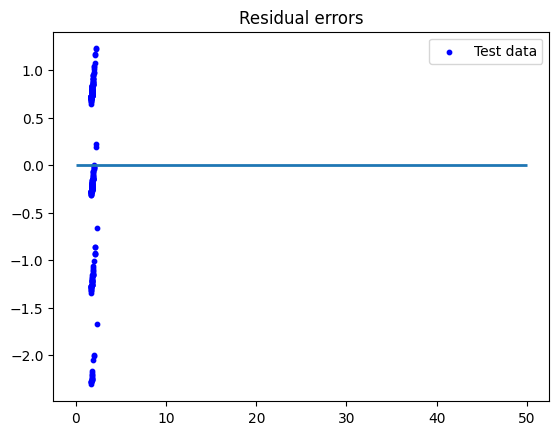

In [71]:
# Plotting residual errors
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

plt.title("Residual errors")
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')

plt.show()

#### Interpretations of Results
**Variance Score of 0.007071**: An R² score close to 1 indicates a good fit. Since the score is close to 0, it suggests that the model does not explain much of the variance in the target variable. 

## Random Forest Regression

In [72]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define features and target variables
X = df[['Age', 'Anxiety']].values  # Only using 'Age' and 'Anxiety'
y = encoded_df['Frequency_Classical_Encoded'].values

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values

In [122]:
# Initialize and fit the Random Forest Regressor with the original features (X)
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
regressor.fit(X, y)

# Access the Out-of-Bag (OOB) Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Make predictions on the same dataset (X)
predictions = regressor.predict(X)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Out-of-Bag Score: -0.16303615609562727
Mean Squared Error: 0.013401500682128241
R^2 Score: 0.8364345350052247


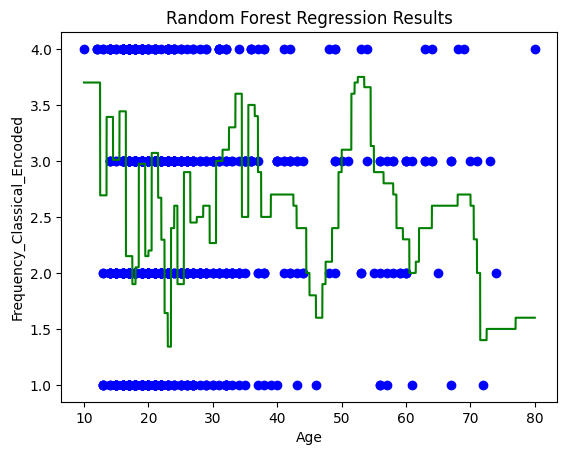

In [74]:
# Visualizing the results
X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X[:, 0], y, color='blue')
plt.plot(X_grid, regressor.predict(np.hstack([X_grid, np.zeros_like(X_grid)])), color='green')
plt.title("Random Forest Regression Results")
plt.xlabel('Age')
plt.ylabel('Frequency_Classical_Encoded')
plt.show()

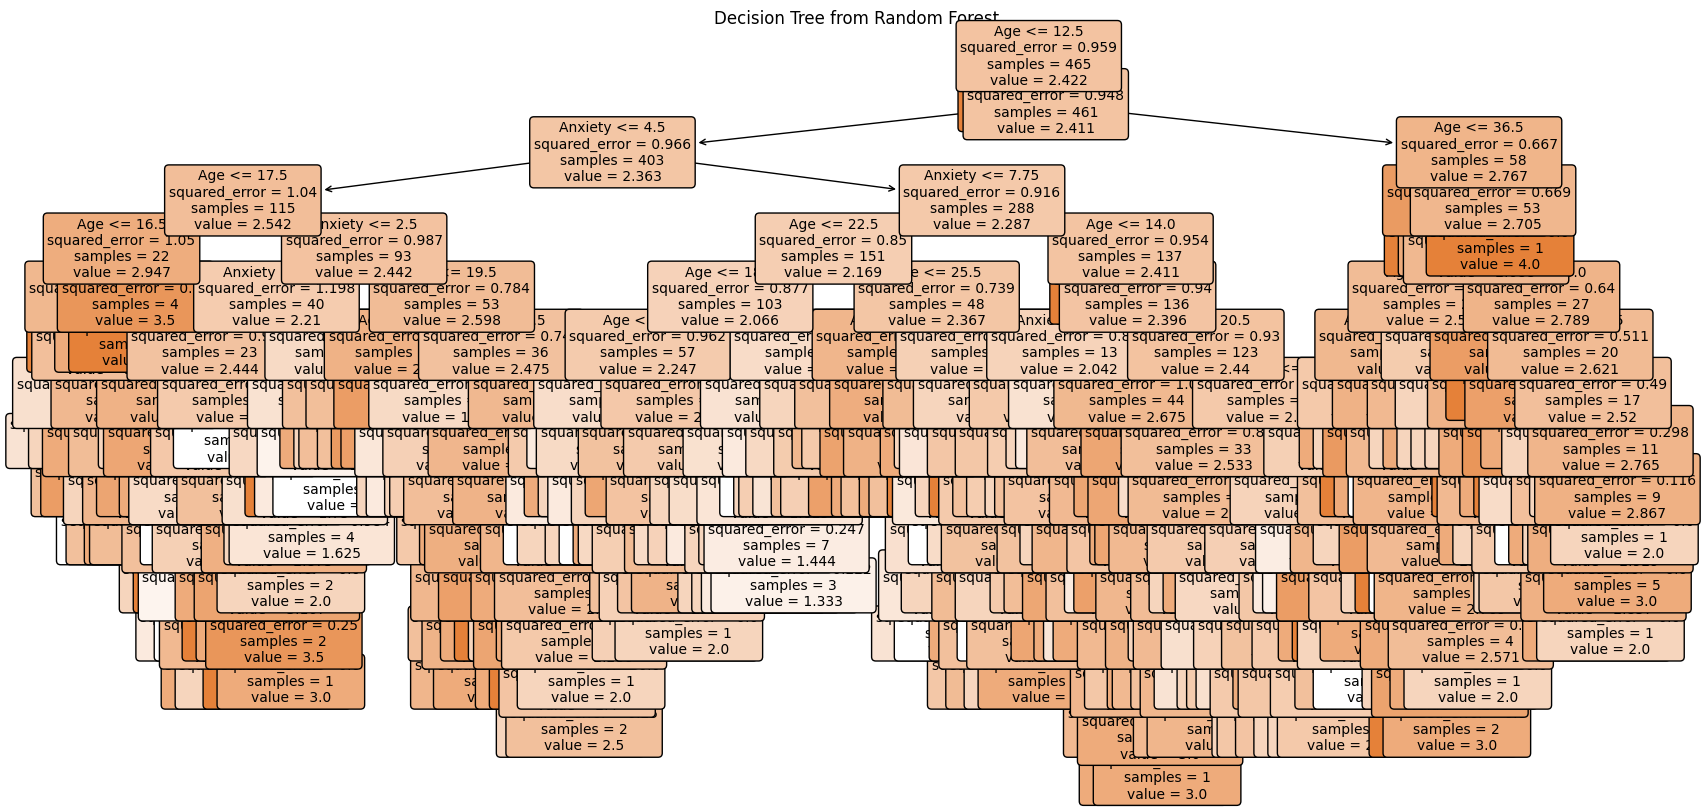

In [75]:
# Visualizing one decision tree from the Random Forest
tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=['Age', 'Anxiety'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

A small R^2 score indicates that the model explains a small proportion of the variance, so the preidctors don't account for much of the variation in the target. The model may not be a good fit for our data.

Next, let's try encoding the frequency levels.

## Gospel

#### Binary Target

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['Gospel_Target'] = create_binary_target(df, 'Frequency_gospel')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['Gospel_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
gospel_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
gospel_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = gospel_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(gospel_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)



Accuracy of the Model: 0.9272727272727272
Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96       205
           1       0.00      0.00      0.00        15

    accuracy                           0.93       220
   macro avg       0.47      0.50      0.48       220
weighted avg       0.87      0.93      0.90       220

Feature Importance:
Age           0.286967
Depression    0.194453
Anxiety       0.188326
Insomnia      0.173487
OCD           0.156767
dtype: float64


### Apply SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
gospel_model = RandomForestClassifier(n_estimators=100)
gospel_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = gospel_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))



Random Forest Test Accuracy with SMOTE: 0.8909090909090909
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94       205
           1       0.00      0.00      0.00        15

    accuracy                           0.89       220
   macro avg       0.46      0.48      0.47       220
weighted avg       0.87      0.89      0.88       220



### Hyperparameter Tuning with RandomizedSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 14, 'min_samples_leaf': 8}
Best score is 0.7758233390443555
Test Accuracy after Tuning: 0.7954545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       175
           1       0.00      0.00      0.00        45

    accuracy                           0.80       220
   macro avg       0.40      0.50      0.44       220
weighted avg       0.63      0.80      0.70       220



In [79]:
gospel_probabilities = gospel_model.predict_proba(X_test)[:, 1] 
print(gospel_probabilities)

[0.31 0.34 0.07 0.05 0.15 0.3  0.22 0.03 0.03 0.02 0.05 0.1  0.12 0.3
 0.05 0.31 0.04 0.09 0.05 0.18 0.09 0.06 0.01 0.   0.01 0.11 0.17 0.02
 0.15 0.14 0.24 0.06 0.08 0.39 0.09 0.09 0.21 0.39 0.04 0.21 0.17 0.03
 0.   0.34 0.01 0.06 0.01 0.01 0.08 0.28 0.26 0.1  0.05 0.23 0.23 0.55
 0.24 0.06 0.33 0.01 0.15 0.06 0.06 0.04 0.19 0.4  0.3  0.03 0.06 0.08
 0.   0.2  0.11 0.01 0.46 0.42 0.14 0.2  0.09 0.03 0.52 0.06 0.1  0.14
 0.03 0.07 0.07 0.18 0.59 0.01 0.03 0.26 0.18 0.21 0.03 0.23 0.08 0.1
 0.03 0.16 0.32 0.1  0.05 0.17 0.05 0.   0.04 0.03 0.24 0.38 0.23 0.07
 0.08 0.05 0.11 0.27 0.02 0.45 0.48 0.16 0.03 0.26 0.36 0.1  0.4  0.36
 0.06 0.12 0.24 0.   0.08 0.35 0.07 0.23 0.08 0.03 0.21 0.   0.31 0.04
 0.17 0.06 0.05 0.02 0.1  0.25 0.05 0.18 0.42 0.12 0.04 0.59 0.01 0.07
 0.06 0.   0.03 0.   0.04 0.71 0.13 0.07 0.23 0.03 0.19 0.56 0.01 0.
 0.08 0.15 0.12 0.03 0.27 0.44 0.   0.19 0.05 0.24 0.11 0.19 0.1  0.4
 0.31 0.48 0.   0.06 0.36 0.62 0.2  0.02 0.26 0.08 0.3  0.14 0.21 0.01
 0.07 0.08 

## Lofi

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['lofi_Target'] = create_binary_target(df, 'Frequency_lofi')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['lofi_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
lofi_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
lofi_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = lofi_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(lofi_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
lofi_model = RandomForestClassifier(n_estimators=100)
lofi_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = lofi_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.75
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.92      0.85       175
           1       0.22      0.09      0.13        45

    accuracy                           0.75       220
   macro avg       0.51      0.50      0.49       220
weighted avg       0.68      0.75      0.71       220

Feature Importance:
Age           0.264092
Insomnia      0.192800
Anxiety       0.187453
Depression    0.182547
OCD           0.173108
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.7363636363636363
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.89      0.84       175
           1       0.26      0.16      0.19        45

    accuracy                           0.74       220
   macro avg       0.53      0.52      0.52       220
weighted avg       0.69      0.74      0.71       220

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_de

In [81]:
lofi_probabilities = lofi_model.predict_proba(X_test)[:, 1]

## Hip hop

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['hiphop_Target'] = create_binary_target(df, 'Frequency_hip_hop')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['hiphop_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
hiphop_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
hiphop_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = hiphop_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(hiphop_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
hiphop_model = RandomForestClassifier(n_estimators=100)
hiphop_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = hiphop_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.6363636363636364
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.86      0.77       153
           1       0.29      0.13      0.18        67

    accuracy                           0.64       220
   macro avg       0.49      0.50      0.47       220
weighted avg       0.57      0.64      0.59       220

Feature Importance:
Age           0.284407
Anxiety       0.190004
Insomnia      0.183212
Depression    0.174002
OCD           0.168375
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.6045454545454545
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.76      0.73       153
           1       0.31      0.25      0.28        67

    accuracy                           0.60       220
   macro avg       0.51      0.51      0.50       220
weighted avg       0.58      0.60      0.59       220

Tuned Decision Tree Parameters: {'criterion': '

In [83]:
hiphop_probabilities = hiphop_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

## K-pop

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['kpop_Target'] = create_binary_target(df, 'Frequency_K_pop')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['kpop_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
kpop_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
kpop_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = kpop_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(kpop_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
kpop_model = RandomForestClassifier(n_estimators=100)
kpop_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = kpop_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.8954545454545455
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94       198
           1       0.00      0.00      0.00        22

    accuracy                           0.90       220
   macro avg       0.45      0.50      0.47       220
weighted avg       0.81      0.90      0.85       220

Feature Importance:
Age           0.253241
Depression    0.200980
Insomnia      0.188879
Anxiety       0.180900
OCD           0.175999
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.8681818181818182
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       198
           1       0.00      0.00      0.00        22

    accuracy                           0.87       220
   macro avg       0.45      0.48      0.46       220
weighted avg       0.81      0.87      0.84       220

Tuned Decision Tree Parameters: {'criterion': '

In [85]:
kpop_probabilities = kpop_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

## EDM

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['EDM_Target'] = create_binary_target(df, 'Frequency_EDM')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['EDM_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
EDM_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
EDM_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = EDM_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(EDM_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
EDM_model = RandomForestClassifier(n_estimators=100)
EDM_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = EDM_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.7227272727272728
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.10      0.04      0.06        45

    accuracy                           0.72       220
   macro avg       0.44      0.47      0.45       220
weighted avg       0.64      0.72      0.68       220

Feature Importance:
Age           0.286432
Anxiety       0.199862
Insomnia      0.184355
Depression    0.171717
OCD           0.157634
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.7181818181818181
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       175
           1       0.16      0.09      0.11        45

    accuracy                           0.72       220
   macro avg       0.47      0.48      0.47       220
weighted avg       0.66      0.72      0.69       220

Tuned Decision Tree Parameters: {'criterion': '

In [87]:
edm_probabilities = EDM_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

## Country

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['country_Target'] = create_binary_target(df, 'Frequency_country')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['country_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
country_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
country_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = country_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(country_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
country_model = RandomForestClassifier(n_estimators=100)
country_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = country_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.8636363636363636
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       191
           1       0.43      0.10      0.17        29

    accuracy                           0.86       220
   macro avg       0.65      0.54      0.55       220
weighted avg       0.82      0.86      0.83       220

Feature Importance:
Age           0.295180
Depression    0.181633
Anxiety       0.178523
Insomnia      0.174772
OCD           0.169892
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.8045454545454546
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.89       191
           1       0.11      0.07      0.09        29

    accuracy                           0.80       220
   macro avg       0.49      0.49      0.49       220
weighted avg       0.77      0.80      0.78       220

Tuned Decision Tree Parameters: {'criterion': '

In [89]:
country_probabilities = country_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)


## Folk

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['folk_Target'] = create_binary_target(df, 'Frequency_folk')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['folk_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
folk_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
folk_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = folk_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(folk_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
folk_model = RandomForestClassifier(n_estimators=100)
folk_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = folk_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.7272727272727273
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.94      0.84       168
           1       0.17      0.04      0.06        52

    accuracy                           0.73       220
   macro avg       0.46      0.49      0.45       220
weighted avg       0.62      0.73      0.66       220

Feature Importance:
Age           0.273402
Insomnia      0.189726
Depression    0.185632
Anxiety       0.180766
OCD           0.170475
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.7227272727272728
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.87      0.83       168
           1       0.37      0.25      0.30        52

    accuracy                           0.72       220
   macro avg       0.58      0.56      0.56       220
weighted avg       0.69      0.72      0.70       220

Tuned Decision Tree Parameters: {'criterion': '

In [91]:
folk_probabilities = folk_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

## Jazz

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['jazz_Target'] = create_binary_target(df, 'Frequency_jazz')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['jazz_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
jazz_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
jazz_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = jazz_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(jazz_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
jazz_model = RandomForestClassifier(n_estimators=100)
jazz_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = jazz_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.7
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.93      0.82       163
           1       0.20      0.05      0.08        57

    accuracy                           0.70       220
   macro avg       0.47      0.49      0.45       220
weighted avg       0.60      0.70      0.63       220

Feature Importance:
Age           0.292403
Anxiety       0.183065
Insomnia      0.179265
OCD           0.174177
Depression    0.171090
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.6636363636363637
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.86      0.79       163
           1       0.21      0.11      0.14        57

    accuracy                           0.66       220
   macro avg       0.47      0.48      0.47       220
weighted avg       0.60      0.66      0.62       220

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_

In [93]:
jazz_probabilities = jazz_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

## Rap

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Binary Target Variable
def create_binary_target(df, column_name):
    return df[column_name].apply(lambda x: 1 if x in ['Very Frequently', 'Sometimes'] else 0)

df['rap_Target'] = create_binary_target(df, 'Frequency_rap')

# Define features and target variable
X = df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['rap_Target']

# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a RF classifier
rap_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training dataset
rap_model.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred = rap_model.predict(X_test)

from sklearn import metrics  
print()
print("Accuracy of the Model:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(rap_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

### APPLY SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RF model on the SMOTE-balanced data
rap_model = RandomForestClassifier(n_estimators=100)
rap_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rap_model.predict(X_test)

# Evaluate the model
from sklearn import metrics  
print()
print("Random Forest Test Accuracy with SMOTE:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

### APPLY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid
param_dist = {
    "max_depth": [3, 5, 10, 20, None],
    "max_features": randint(1, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, n_iter=100, random_state=1, n_jobs=-1)
tree_cv.fit(X_train, y_train)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

y_pred_tuned = tree_cv.best_estimator_.predict(X_test)
print("Test Accuracy after Tuning:", metrics.accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tuned, zero_division=0))



Accuracy of the Model: 0.6545454545454545
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.85      0.79       164
           1       0.17      0.09      0.12        56

    accuracy                           0.65       220
   macro avg       0.45      0.47      0.45       220
weighted avg       0.59      0.65      0.62       220

Feature Importance:
Age           0.290881
Anxiety       0.187646
Depression    0.180174
Insomnia      0.177846
OCD           0.163452
dtype: float64

Random Forest Test Accuracy with SMOTE: 0.6227272727272727
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.77      0.75       164
           1       0.21      0.18      0.19        56

    accuracy                           0.62       220
   macro avg       0.47      0.48      0.47       220
weighted avg       0.60      0.62      0.61       220

Tuned Decision Tree Parameters: {'criterion': '

In [95]:
rap_probabilities = rap_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

### Combine possibilities

In [96]:
probabilities_df = pd.DataFrame({
    'Gospel': gospel_probabilities,
    'Lofi': lofi_probabilities,
    'HipHop': hiphop_probabilities,
    'Kpop': kpop_probabilities,
    'EDM': edm_probabilities,
    'Country': country_probabilities,
    'Folk': folk_probabilities,
    'Jazz': jazz_probabilities,
    'Rap': rap_probabilities
})


In [97]:
print(probabilities_df.dtypes)

Gospel     float64
Lofi       float64
HipHop     float64
Kpop       float64
EDM        float64
Country    float64
Folk       float64
Jazz       float64
Rap        float64
dtype: object


## Recommendation Engine

In [108]:
def recommend_engine(user_input, models, features):
    """
    Recommends music genres based on user input of their age and mental health levels.

    Parameters:
    - user_input: dictionary with keys of features such as age and anxiety level
    - models: dictionary of trained ML models for each genre
    - features: list of features used in the models

    Returns: a dataframe of the top recommended genres and their probabilities
    """
    
    # Make sure all required features are present in the user's input
    missing_features = []
    for i in features:
        if i not in user_input:
            missing_features.append(i)
            
    if missing_features:
        raise ValueError(f"You are missing input features: {', '.join(missing_features)}")

    # Convert user input to a DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Calculate probabilities for each genre
    probabilities_dict = {}
    for genre, model in models.items():
        try: 
            prob = model.predict_proba(input_df[features])[:, 1][0]
            probabilities_dict[genre] = prob
        except Exception as e:
            print("There is an error predicting genre '{genre}': {e}")
            continue

    if not probabilities_dict:
        raise RuntimeError("Can't make predictions for any of the genres.")
    
    # Convert probabilities to a DataFrame
    probabilities_df = pd.DataFrame(list(probabilities_dict.items()), columns=['Genre', 'Probability'])
    
    # Sort the genres by their probability in descending order
    rec_genres = probabilities_df.sort_values(by='Probability', ascending=False)
    
    return rec_genres

# Example user usage
user_input = {'Age': 25, 'Anxiety': 9, 'Depression': 5, 'Insomnia': 2, 'OCD': 10}
models = {
    'Gospel': gospel_model,
    'Lofi': lofi_model,
    'HipHop': hiphop_model,
    'Kpop': kpop_model,
    'EDM': EDM_model,
    'Country': country_model,
    'Folk': folk_model,
    'Jazz': jazz_model,
    'Rap': rap_model
}
features = ['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

rec = recommend_engine(user_input, models, features)
print(rec)


     Genre  Probability
5  Country       0.5200
1     Lofi       0.2900
2   HipHop       0.2800
4      EDM       0.1900
3     Kpop       0.1700
8      Rap       0.1525
6     Folk       0.1300
0   Gospel       0.0700
7     Jazz       0.0700
